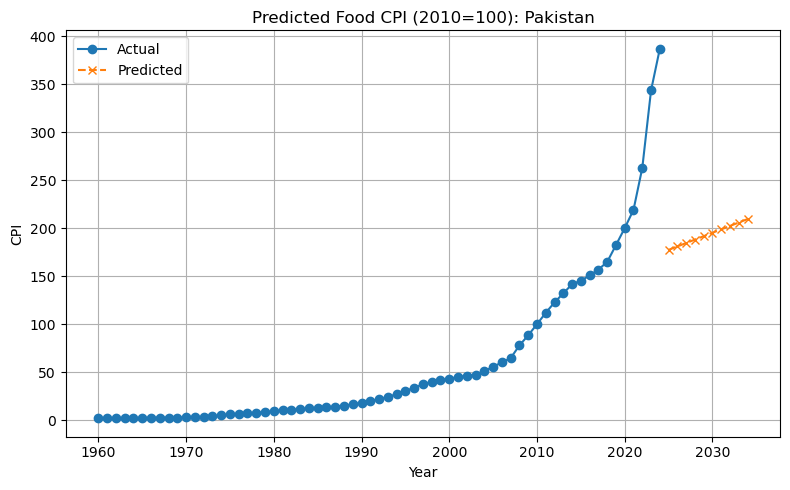

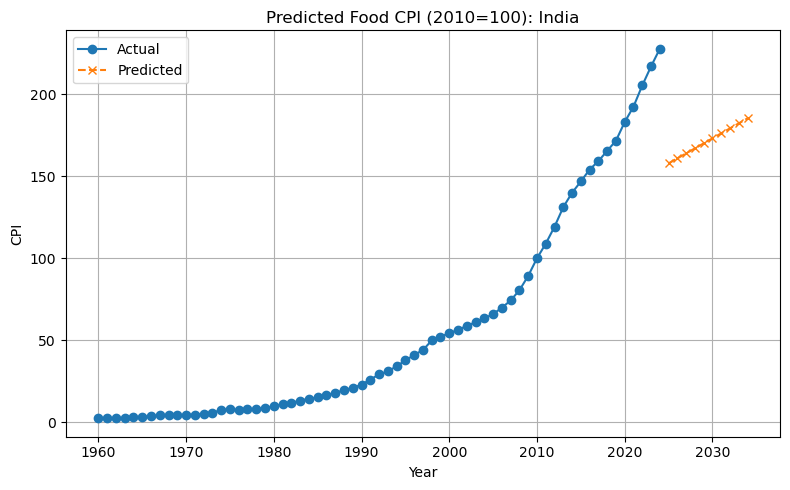

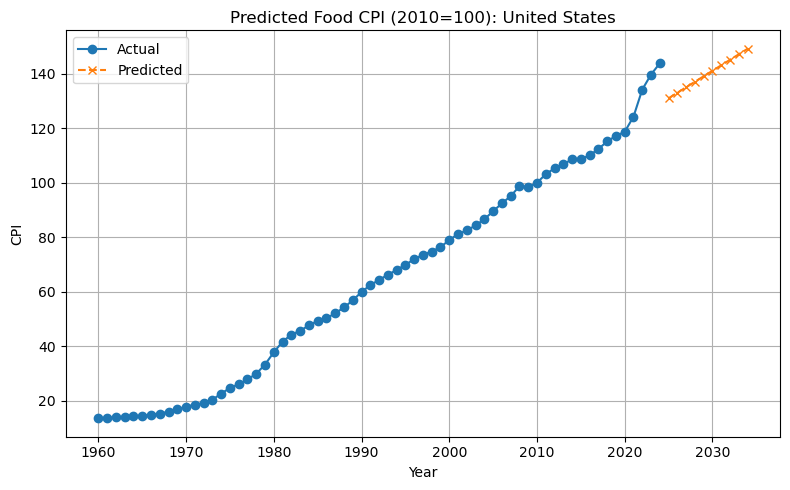

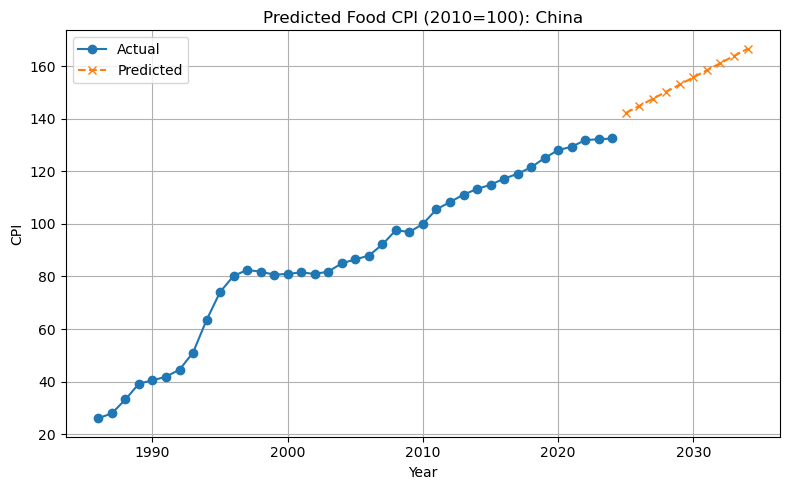

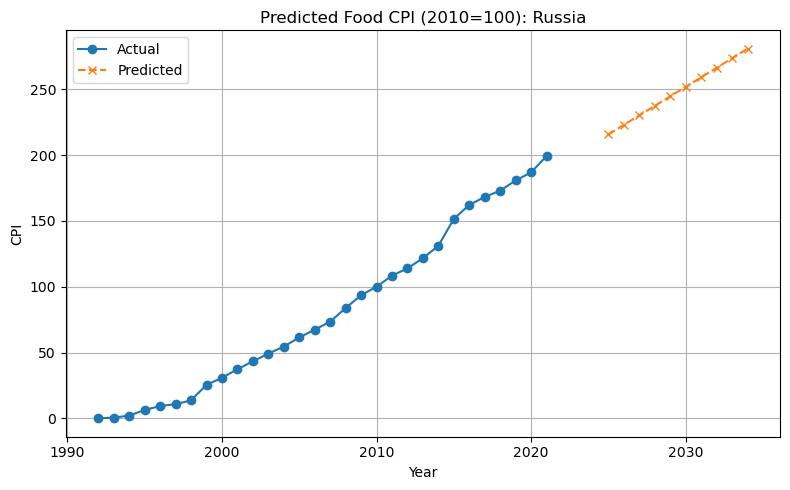

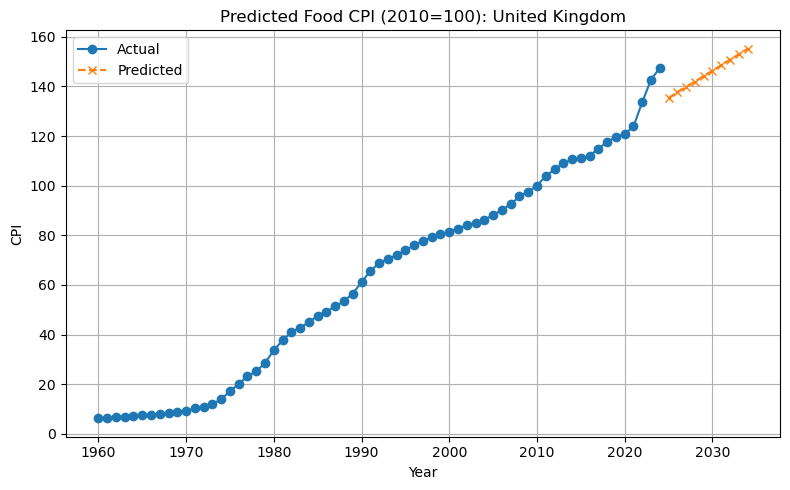

Not enough historical data for World, skipping.
Future CPI Predictions (2025–2034):


,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034
Pakistan,177.43,180.99,184.55,188.11,191.67,195.23,198.78,202.34,205.90,209.46
India,157.80,160.85,163.90,166.95,170.00,173.05,176.10,179.14,182.19,185.24
United States,131.02,133.04,135.05,137.07,139.09,141.10,143.12,145.14,147.15,149.17
China,142.21,144.93,147.64,150.36,153.07,155.79,158.50,161.22,163.93,166.64
Russia,215.71,222.94,230.17,237.39,244.62,251.85,259.08,266.30,273.53,280.76
United Kingdom,135.36,137.56,139.75,141.95,144.15,146.35,148.54,150.74,152.94,155.14
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.linear_model import LinearRegression

# Countries of interest with ISO codes
countries = {
    "PK": "Pakistan",
    "IN": "India",
    "US": "United States",
    "CN": "China",
    "RU": "Russia",
    "GB": "United Kingdom",
    "WLD": "World"
}

# Function to fetch CPI data from World Bank API
def fetch_worldbank_data():
    all_data = []
    for code, name in countries.items():
        url = f"https://api.worldbank.org/v2/country/{code}/indicator/FP.CPI.TOTL?format=json&per_page=1000"
        try:
            r = requests.get(url)
            r.raise_for_status()
            data = r.json()
            if len(data) < 2:
                continue
            for row in data[1]:
                year = int(row['date'])
                value = row['value']
                if value is not None and 1960 <= year <= 2024:
                    all_data.append({"Country": name, "Year": year, "CPI": value})
        except:
            print(f"Failed to load from API for {name}, skipping.")
    return pd.DataFrame(all_data)

# Step 1: Load data
df = fetch_worldbank_data()
if df.empty:
    raise RuntimeError("Failed to load CPI data from API or CSV fallback.")

# Step 2: Prepare for prediction
future_years = np.arange(2025, 2035)
prediction_df = pd.DataFrame(index=countries.values(), columns=future_years)

# Step 3: Predict CPI for each country
for country in countries.values():
    country_data = df[df["Country"] == country].dropna()

    if len(country_data) < 10:
        print(f"Not enough historical data for {country}, skipping.")
        continue

    country_data = country_data.sort_values("Year")
    X = country_data["Year"].values.reshape(-1, 1)
    y = country_data["CPI"].values

    # Train model
    model = LinearRegression()
    model.fit(X, y)

    # Predict
    future_X = future_years.reshape(-1, 1)
    predictions = model.predict(future_X)

    # Store predictions in the DataFrame
    prediction_df.loc[country] = predictions

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(X.flatten(), y, label="Actual", marker='o')
    plt.plot(future_years, predictions, label="Predicted", linestyle='--', marker='x')
    plt.title(f"Predicted Food CPI (2010=100): {country}")
    plt.xlabel("Year")
    plt.ylabel("CPI")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Step 4: Display prediction table
pd.set_option("display.float_format", "{:.2f}".format)
print("Future CPI Predictions (2025–2034):")
prediction_df



Predicted Inflation Rate for Pakistan


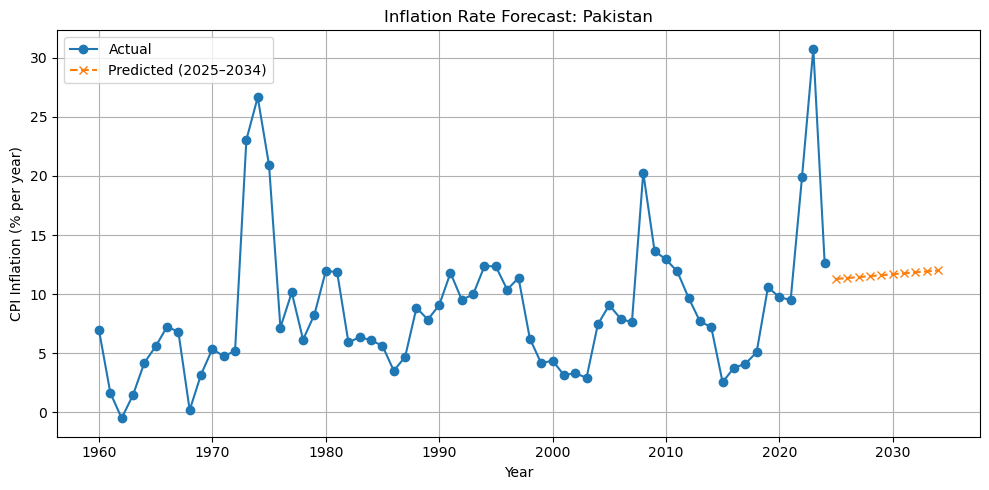


Predicted Inflation Rate for India


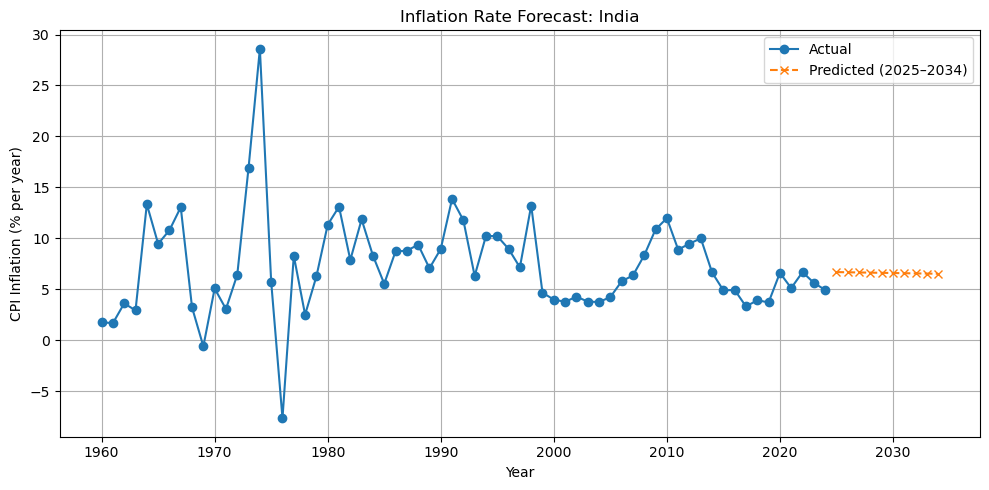


Predicted Inflation Rate for United States


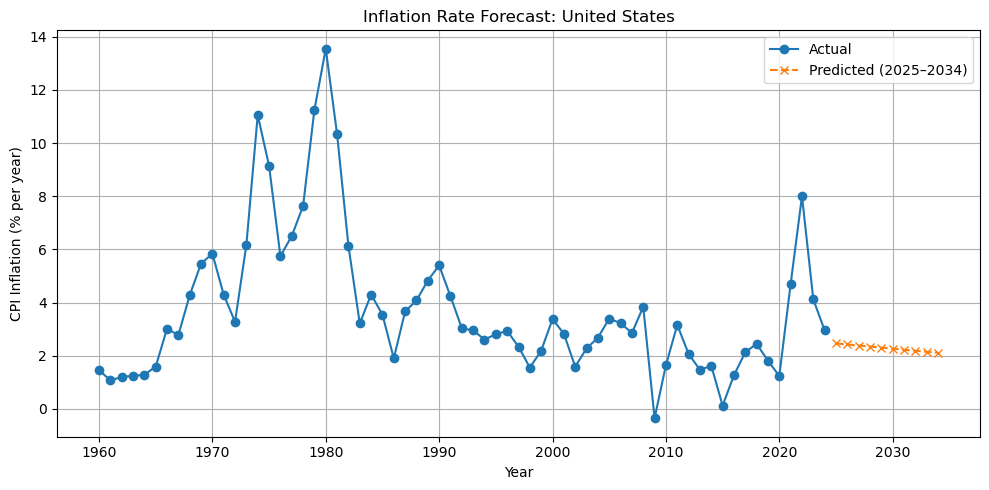


Predicted Inflation Rate for China


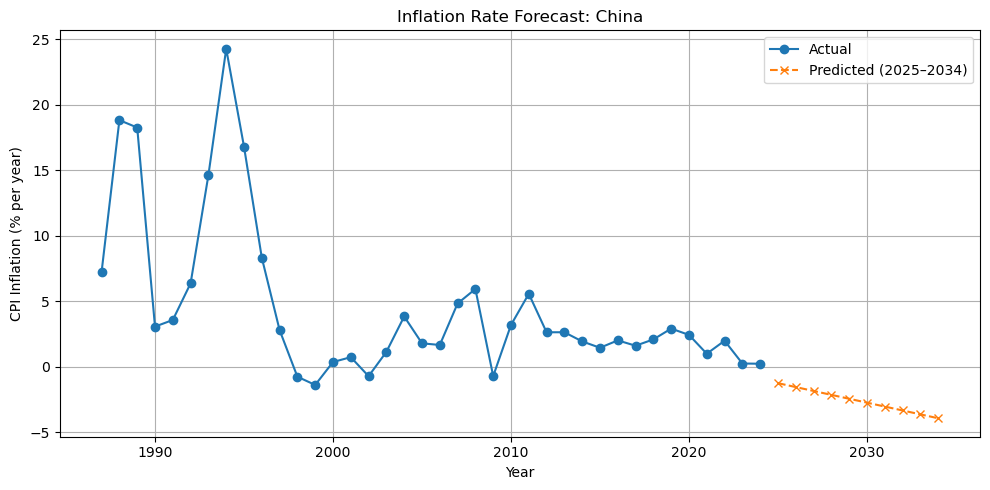


Predicted Inflation Rate for Russian Federation


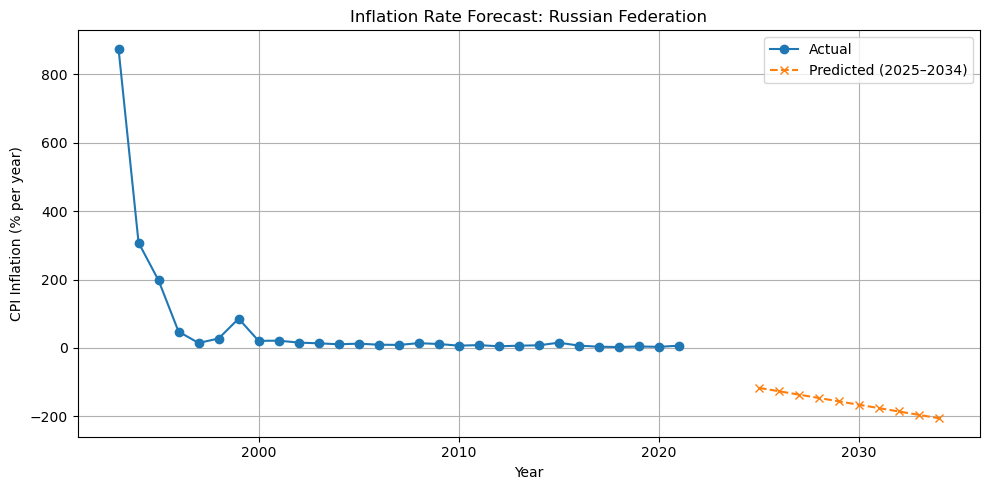


Predicted Inflation Rate for United Kingdom


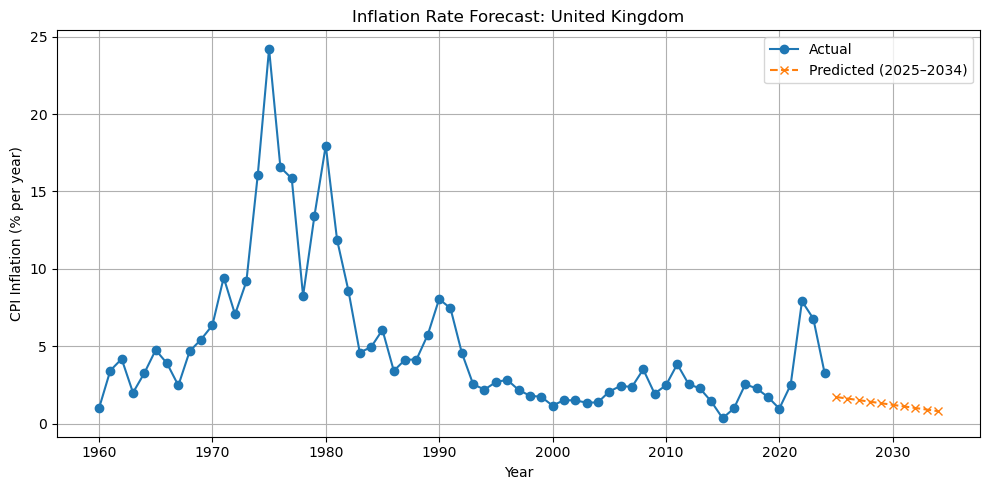


Predicted Inflation Rate for World


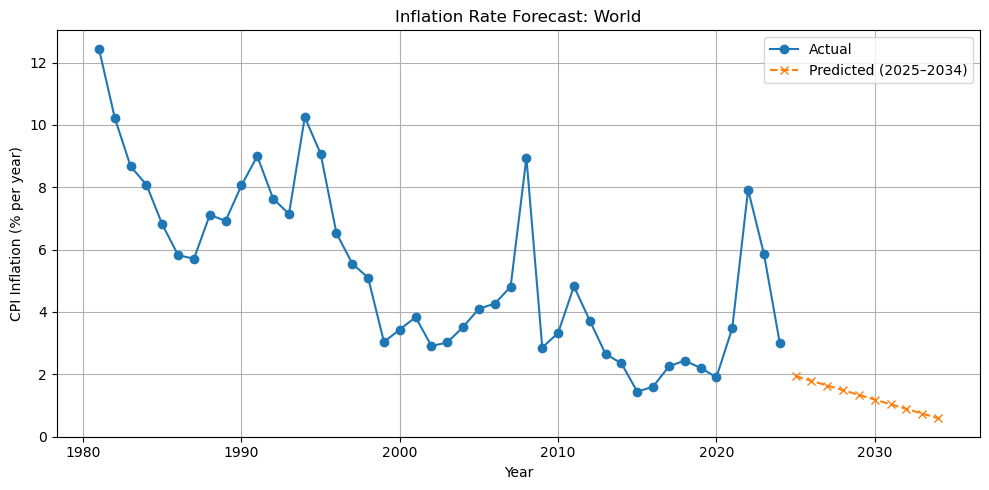


📊 Prediction Table (CPI Inflation %):


,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034
Pakistan,11.28,11.36,11.44,11.52,11.60,11.68,11.76,11.84,11.92,12.00
India,6.70,6.68,6.66,6.65,6.63,6.61,6.59,6.57,6.55,6.54
United States,2.46,2.42,2.38,2.34,2.30,2.26,2.22,2.19,2.15,2.11
China,-1.27,-1.56,-1.86,-2.16,-2.46,-2.75,-3.05,-3.35,-3.65,-3.94
Russian Federation,-116.47,-126.34,-136.21,-146.07,-155.94,-165.81,-175.68,-185.55,-195.42,-205.28
United Kingdom,1.74,1.64,1.54,1.44,1.33,1.23,1.13,1.03,0.93,0.83
World,1.94,1.79,1.64,1.49,1.34,1.19,1.04,0.89,0.74,0.59


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === Step 1: Load CSV ===
csv_file = r"C:\Users\mugha\PycharmProjects\JupyterProject\API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_122376.csv"

# Load and clean
raw_df = pd.read_csv(csv_file, skiprows=4)
years = [str(y) for y in range(1960, 2025)]
raw_df = raw_df[["Country Name"] + years]
raw_df.dropna(subset=years, how='all', inplace=True)
raw_df.set_index("Country Name", inplace=True)
raw_df = raw_df.transpose()
raw_df.index = raw_df.index.astype(int)

# === Step 2: Select Countries ===
countries = {
    "Pakistan": "PK",
    "India": "IN",
    "United States": "US",
    "China": "CN",
    "Russian Federation": "RUS",
    "United Kingdom": "GB",
    "World": "WLD"
}

future_years = np.arange(2025, 2035)
prediction_df = pd.DataFrame(index=countries.keys(), columns=future_years)

# === Step 3: Predict & Plot ===
for country in countries.keys():
    if country not in raw_df.columns:
        print(f"⚠️ {country} data not found, skipping.")
        continue

    country_data = raw_df[country].dropna()
    if len(country_data) < 10:
        print(f"⚠️ Not enough data for {country}, skipping.")
        continue

    X = country_data.index.values.reshape(-1, 1)
    y = country_data.values

    model = LinearRegression()
    model.fit(X, y)

    future_preds = model.predict(future_years.reshape(-1, 1))

    # Save predictions in the DataFrame
    prediction_df.loc[country] = [round(p, 2) for p in future_preds]

    # Print predicted values
    print("\nPredicted Inflation Rate for", country)
 #   print("Year\tInflation %")
 #   for year, pred in zip(future_years, future_preds):
 #      print(f"{year}\t{pred:.2f}")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(X.flatten(), y, label="Actual", marker='o')
    plt.plot(future_years, future_preds, label="Predicted (2025–2034)", linestyle='--', marker='x')
    plt.title(f"Inflation Rate Forecast: {country}")
    plt.xlabel("Year")
    plt.ylabel("CPI Inflation (% per year)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# === Step 4: Final Table ===
print("\n📊 Prediction Table (CPI Inflation %):")
prediction_df
